# Wine Dataset

In [11]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats import chisquare

In [2]:
df = pd.read_csv('wine.csv')
print(df.columns)
print(df.describe().to_string())

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium     Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color         Hue    Dilution      Proline
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000     178.000000       178.000000  178.000000  178.000000  178.000000   178.000000
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573    2.295112    2.029270       0.361854         1.590899    5.058090    0.957449    2.611685   746.893258
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484    0.625851    0.998859       0.124453         0.572359    2.318286    0.228572    0.709990   314.907474
min      1.000000   11.030000    0.740000    1.360000   10.600

## [2] Principal Component Analysis (PCA)

### [2.1] Correlation heatmap of features

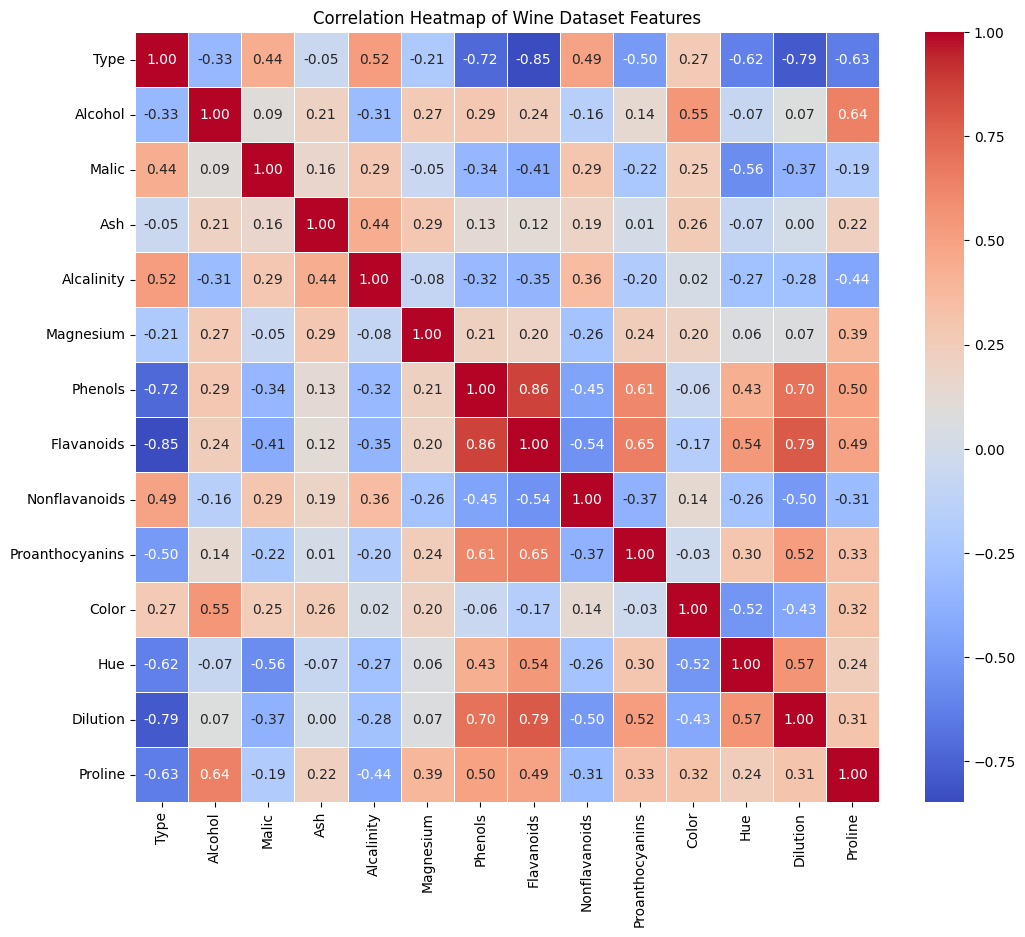

In [3]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Wine Dataset Features')
plt.show()

### [2.2] Parallel Analysis

In [4]:
standardized_data = (df - df.mean()) / df.std()
pca = PCA()
pca.fit(standardized_data)
eigenvalues = pca.explained_variance_
num_iterations = 1000
random_data = np.random.normal(0, 1, size=standardized_data.shape)
pca_random = PCA()
pca_random.fit(random_data)
eigenvalues_random = pca_random.explained_variance_
mean_random_eigenvalues = np.mean(eigenvalues_random, axis=0)
retain_components = eigenvalues > mean_random_eigenvalues
num_retained_components = np.sum(retain_components)

print("Number of components to retain according to parallel analysis:", num_retained_components)
print("Proportion of variance explained by each component:", pca.explained_variance_ratio_)


Number of components to retain according to parallel analysis: 3
Proportion of variance explained by each component: [0.39542486 0.17836259 0.10329102 0.06627984 0.06267875 0.0480556
 0.03955707 0.02500244 0.02103871 0.01873615 0.01613203 0.01205691
 0.00925458 0.00412945]


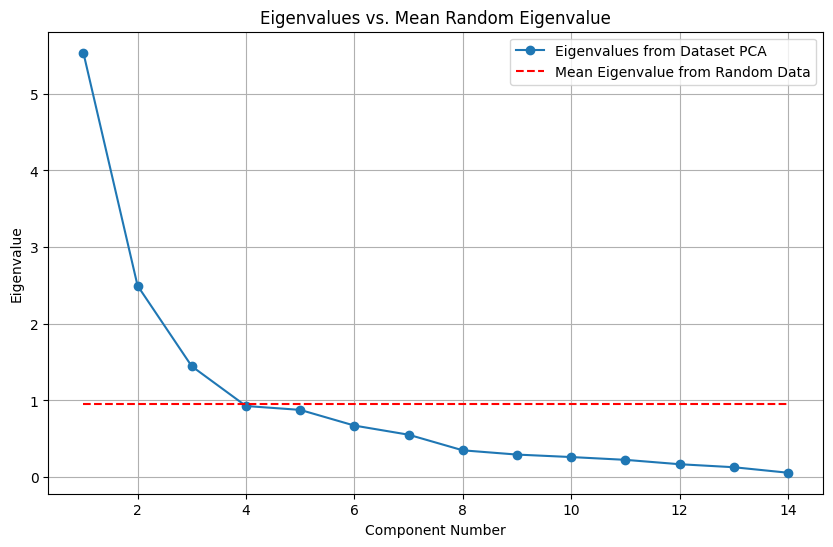

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o', label='Eigenvalues from Dataset PCA')
plt.hlines(np.mean(eigenvalues_random), 1, len(eigenvalues), colors='r', linestyles='dashed', label='Mean Eigenvalue from Random Data')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues vs. Mean Random Eigenvalue')
plt.legend()
plt.grid(True)
plt.show()

### PCA on wine dataset

In [7]:
standardized_data = (df - df.mean()) / df.std()
pca = PCA(n_components=3)
pca.fit(standardized_data)
variance_explained = pca.explained_variance_ratio_
print("Proportion of variance explained by the first three principal components:")
for i, explained_variance in enumerate(variance_explained):
    print(f"Principal Component {i+1}: {explained_variance:.2f}")
total_variance_explained = sum(variance_explained)
print(f"Total variance explained by the first three principal components: {total_variance_explained:.2f}")

Proportion of variance explained by the first three principal components:
Principal Component 1: 0.40
Principal Component 2: 0.18
Principal Component 3: 0.10
Total variance explained by the first three principal components: 0.68


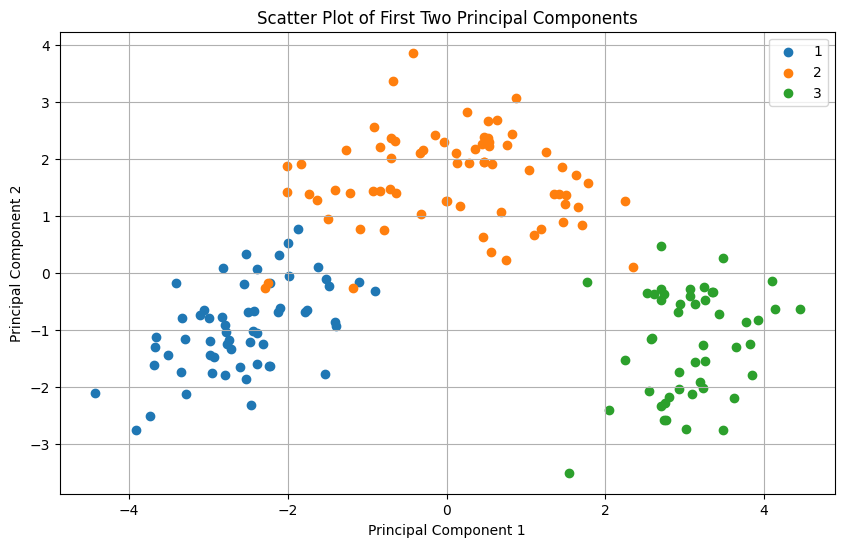

In [9]:
pca_transformed = pca.transform(standardized_data)
pc1 = pca_transformed[:, 0]
pc2 = pca_transformed[:, 1]
plt.figure(figsize=(10, 6))
for wine_type in df['Type'].unique():
    plt.scatter(pc1[df['Type'] == wine_type], 
                pc2[df['Type'] == wine_type], 
                label=wine_type)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components')
plt.legend()
plt.grid(True)
plt.show()

## [3] Chi-Square Test - Goodness of Fit

### Hypotheses:

**Null Hypothesis (H0):** The observed distribution of wine types does not significantly differ from an equal distribution amongst the three types.

**Alternative Hypothesis (H1):** The observed distribution of wine types significantly differs from an equal distribution amongst the three types.

### Expected Frequencies:

Since we assume an equal distribution among the three types, each type is expected to have 178/3 = 59.33 occurrences.

In [12]:
observed_frequencies = np.array([59, 71, 48])
expected_frequency = 178 / 3
expected_frequencies = np.array([expected_frequency, expected_frequency, expected_frequency])
chi2_statistic, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)
df = len(observed_frequencies) - 1
print("Chi-Square Statistic:", chi2_statistic)
print("Degrees of Freedom:", df)
print("p-value:", p_value)

Chi-Square Statistic: 4.4606741573033695
Degrees of Freedom: 2
p-value: 0.10749219070565924


In [13]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The observed distribution significantly differs from an equal distribution.")
else:
    print("Fail to reject the null hypothesis. The observed distribution does not significantly differ from an equal distribution.")

Fail to reject the null hypothesis. The observed distribution does not significantly differ from an equal distribution.


In [20]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency


low_percentile = df['Alcohol'].quantile(0.33)
high_percentile = df['Alcohol'].quantile(0.66)
df['Alcohol_Category'] = pd.cut(df['Alcohol'], bins=[-float('inf'), low_percentile, high_percentile, float('inf')],
                                 labels=['Low', 'Medium', 'High'])


contingency_table = pd.crosstab(df['Type'], df['Alcohol_Category'])

# Step 3: Formulate hypotheses
# Null Hypothesis (H0): There is no association between wine type and alcohol category.
# Alternative Hypothesis (H1): There is an association between wine type and alcohol category.


chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)


alpha = 0.05
print("Chi-Square Statistic:", chi2_statistic)
print("Degrees of Freedom:", dof)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is evidence of an association between wine type and alcohol category.")
else:
    print("Fail to reject the null hypothesis. There is no evidence of an association between wine type and alcohol category.")


ValueError: DataFrame constructor not properly called!